In [112]:
%matplotlib inline
import pandas as pd
from subprocess import call
import os

client_id = "dqn13"

logs_dir = "../" + client_id + "/logs"
config_dir = "../" + client_id + "/config"
ret = call(["aws", "s3", "sync", "s3://" + client_id + "/logs", logs_dir])
ret = call(["aws", "s3", "sync", "s3://" + client_id + "/config", config_dir])


if ret != 0:
    print("Problem ", ret)
else:
    print("Downloaded!")

Downloaded!


In [94]:
import os
import pandas as pd
paths = [(logs_dir + "/" + file_name, file_name) for file_name in sorted(os.listdir(logs_dir)) if file_name.endswith(".s")]


log=None
log = pd.Series()
try:
    for path, filename in paths:
        if filename <= '@4000000056d31eff151cea34.s':
          log = pd.concat([log, pd.read_csv(path, sep='|', header=None, engine='python')])
        else:
          log = pd.concat([log, pd.read_csv(path, sep='|', header=None, engine='python', compression='gzip')])
except:
    print(filename)
print(len(log))
log = log.iloc[:,0]

794200


In [110]:

rewards = log[log.str.contains("Game reward: ")].str.extract('Game reward: (\d*)').astype(float)
rewards.index = range(0,len(rewards.index))
loss = log[log.str.contains("loss:")].str.extract('loss:  (\d+\.\d+)').astype(float)
loss.index = range(0, len(loss.index))
epsilon = log[log.str.contains('epsilon:')].str.extract('epsilon:  (\d+\.\d+)').astype(float)
epsilon.index = range(0, len(epsilon.index))
weights = log[log.str.contains("saved")].str.extract('File saved:  weights/weights_(\d+).npz').astype(float)
weights.index = range(0, len(weights.index))

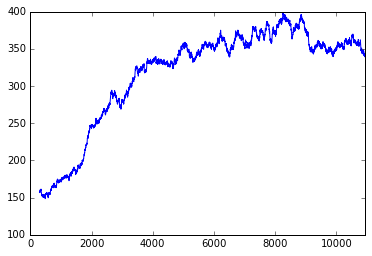

In [96]:
pd.rolling_mean(rewards, 300).plot()

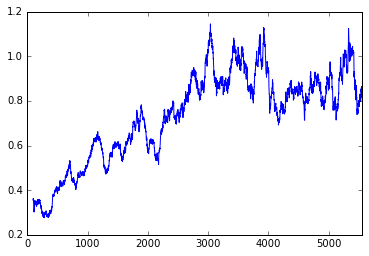

In [90]:
pd.rolling_mean(loss, 100).plot()

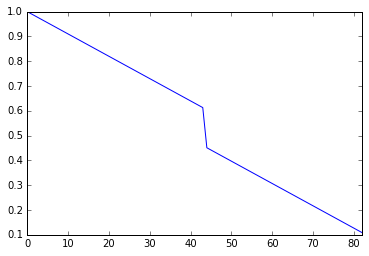

In [92]:
epsilon.plot()

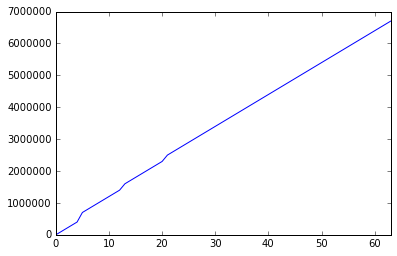

In [111]:
weights.plot()

In [114]:
ret = call(["./fetch_weights.sh"])
if ret != 0:
    print("Problem ", ret)